In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import cv2
import os


2022-06-07 13:00:51.141211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 13:00:51.141239: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
train_folder = "/home/khris/Desktop/NEW_DATASET/TRIAN/"
validation_folder = "/home/khris/Desktop/NEW_DATASET/VAL/"
test_folder = "/home/khris/Desktop/NEW_DATASET/TEST/"

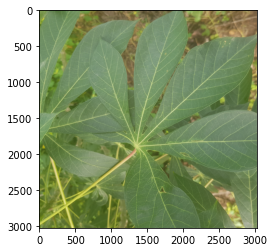

In [22]:
img = image.load_img('/home/khris/Desktop/NEW_DATASET/TRIAN/CROP/Crop463.jpg')
plt.imshow(img)

In [23]:
cv2.imread("/home/khris/Desktop/PROJECT DATASET/TRAINING/CROP/Crop1444.jpg")
# 3D array matrix of that image

array([[[ 61, 111,  77],
        [ 45,  95,  61],
        [ 43,  92,  60],
        ...,
        [ 61, 137,  96],
        [ 66, 142, 101],
        [ 52, 128,  87]],

       [[ 59, 109,  75],
        [ 55, 105,  71],
        [ 50,  99,  67],
        ...,
        [ 63, 139,  98],
        [ 61, 137,  96],
        [ 48, 124,  83]],

       [[ 54, 104,  70],
        [ 62, 111,  79],
        [ 62, 111,  79],
        ...,
        [ 61, 137,  96],
        [ 54, 130,  89],
        [ 47, 123,  82]],

       ...,

       [[ 77, 136, 108],
        [ 70, 131, 103],
        [ 52, 113,  87],
        ...,
        [ 25,  87,  63],
        [ 28,  90,  66],
        [ 29,  91,  69]],

       [[ 80, 139, 111],
        [ 68, 129, 101],
        [ 46, 107,  81],
        ...,
        [ 24,  86,  62],
        [ 21,  83,  61],
        [ 19,  81,  59]],

       [[ 79, 138, 110],
        [ 70, 131, 103],
        [ 51, 112,  86],
        ...,
        [ 21,  83,  59],
        [ 18,  80,  58],
        [ 19,  81,  59]]

In [24]:
cv2.imread("/home/khris/Desktop/PROJECT DATASET/TRAINING/CROP/Crop1444.jpg").shape
# To see the size of the image

(3024, 3024, 3)

In [25]:
train = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [26]:
CLASS1 = ['CROP', 'WEED']
CLASS2 = ['WEED', 'CROP']
train_dataset = train.flow_from_directory(train_folder,
 target_size=(150,150), batch_size=10, classes=CLASS2)
valid_dataset = valid.flow_from_directory(validation_folder,
 target_size=(150,150), batch_size=10, classes=CLASS2)
test_dataset = test.flow_from_directory(test_folder, target_size=(150,150),
 batch_size=10, classes=CLASS2, shuffle=False)

Found 700 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [27]:
imgs, labels = next(train_dataset)
def plotimages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

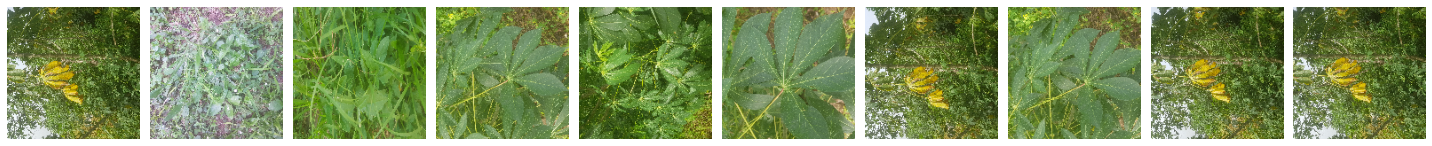

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [28]:
plotimages(imgs)
print(labels)

In [29]:
# To see the labels of the dataset
train_dataset.class_indices

{'WEED': 0, 'CROP': 1}

In [30]:
# THE MODEL
model = Sequential()
model.add(Conv2D(input_shape=(150, 150, 3), filters=32,
 kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=5, verbose=2)

Epoch 1/5
70/70 - 128s - loss: 0.7047 - accuracy: 0.5400 - val_loss: 0.6385 - val_accuracy: 0.5962 - 128s/epoch - 2s/step
Epoch 2/5
70/70 - 129s - loss: 0.2804 - accuracy: 0.8586 - val_loss: 0.0939 - val_accuracy: 0.9577 - 129s/epoch - 2s/step
Epoch 3/5
70/70 - 111s - loss: 0.4117 - accuracy: 0.8414 - val_loss: 0.4857 - val_accuracy: 0.7077 - 111s/epoch - 2s/step
Epoch 4/5
70/70 - 108s - loss: 0.3026 - accuracy: 0.8986 - val_loss: 0.2325 - val_accuracy: 0.8923 - 108s/epoch - 2s/step
Epoch 5/5
70/70 - 121s - loss: 0.1115 - accuracy: 0.9600 - val_loss: 0.1472 - val_accuracy: 0.9192 - 121s/epoch - 2s/step


In [33]:
# TO SHOW A TABLE OF THE ACCURACY AND LOSS
metrics_df = pd.DataFrame(history.history)
pd.DataFrame(metrics_df, columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

,loss,accuracy,val_loss,val_accuracy
0,0.704710,0.540000,0.638521,0.596154
1,0.280383,0.858571,0.093939,0.957692
2,0.411653,0.841429,0.485687,0.707692
3,0.302553,0.898571,0.232478,0.892308
4,0.111506,0.960000,0.147197,0.919231


In [34]:
# EVALUATION ON VALIDATION SET
loss, accuracy = model.evaluate(valid_dataset)
print('Accuracy on Validation dataset:', accuracy*100,'%')
print('Loss on Validation dataset:', loss*100,'%')

26/26 [==============================] - 23s 869ms/step - loss: 0.1472 - accuracy: 0.9192
Accuracy on Validation dataset: 91.92307591438293 %
Loss on Validation dataset: 14.719721674919128 %


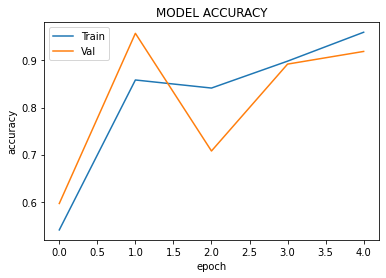

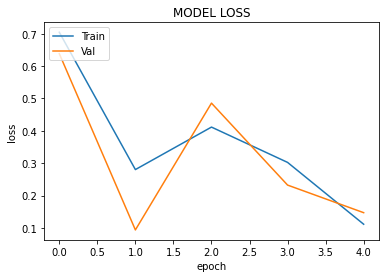

In [35]:
###################################### plots ############################
#plot accuracy and recall
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
predictions = model.predict(x=test_dataset, verbose=2)

10/10 - 11s - 11s/epoch - 1s/step


In [39]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions, axis=-1))

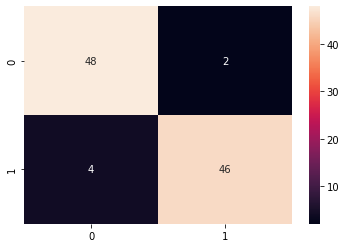

In [41]:
import seaborn
cm_plot_labels = ['WEED', 'CROP']
# ConfusionMatrixDisplay.from_estimator(confusion_matrix, cm_plot_labels, Confusion Matrix)
f = seaborn.heatmap(cm, annot=True, fmt='d')